# Guía para primer entregable del reto: Frenado Electromagnético

Clase: F1014B Modelación Computacional de Sistemas Electromagnéticos

Autor: Jorge Pérez.

Profesor: Edoardo Bucheli. Profesor de Cátedra, Tec de Monterrey Campus Santa Fe.

La plantilla fue proveida por el profesor.

## Campo Magnético debido a un Dipolo Magnético

En este entregable, vamos a graficar el campo magnético debido a un dipolo magnético. Es decir a un imán permanente estático.

Este campo magnético es un campo vectorial que se puede encontrar con la siguiente expresión,

$$\vec{\mathbf{B}} = \frac{\mu_0}{4\pi}\bigg[\frac{3\mathbf{\hat{r}}(\mathbf{m}\cdot\mathbf{\hat{r}})-\mathbf{m}}{r^3}\bigg]$$

Donde:

* $\mu_0 = 4\pi\times10^{-7} T\cdot m/A$ es una constante llamada **permeabilidad del espacio libre**
* $\mathbf{\hat{r}}$ es un **vector unitario** con dirección del dipolo al punto del espacio donde queremos calcular el campo magnético.
* $\mathbf{m}$ es el **momento magnético**. Básicamente, es un vector que apunta del sur al norte del dipolo y cuya magnitud describe la fuerza del imán.
* r es la **distancia** del dipolo al punto donde se quiere calcular el campo magnético.

No usamos exactamente la ley de Biot-Savart pues ésta es para el campo magnético debido a una corriente eléctrica. Sin embargo, la ecuación es parecida ya que se obtiene a partir de la ley de Biot-Savart para un bucle pequeño con corriente.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Lo siguiente que queremos hacer es definir los valores que vamos a utilizar, incluyendo la **permeabilidad del espacio libre**, $\mu_0$. La cual se define como.

$$\mu_0=4\pi\times 10^{-7}T\cdot m/A$$

Calculamos $\mu_0$ usando la expresión anterior

In [14]:
mu_0 = np.pi*4E-7

Además de eso, podemos definir la posición de nuestro dipolo magnético `r0` y su momento magnético `m`.

In [15]:
r0 = [0.0,-0.0]
m = [0,0.01]

Como vamos a graficar un campo vectorial, necesitamos crear una cuadrícula donde tendremos la posición de cada vector y que nos permitirá calcular las distancias de cada punto al dipolo.

Esto ya lo hemos hecho en el bloque anterior.

In [16]:
# Crea tu cuadrícula X y Y como lo hiciste para el campo eléctrico

x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)

X, Y = np.meshgrid(x,y)

Calculo del desplazamiento cuando el dipolo no se encuentra en el origen.

In [17]:
X_disp = X-r0[0]
Y_disp = Y-r0[1]

Pensemos nuevamente en la ecuación del campo y analicémosla por partes,

$$\vec{\mathbf{B}} = \frac{\mu_0}{4\pi}\bigg[\frac{3\mathbf{\hat{r}}(\mathbf{m}\cdot\mathbf{\hat{r}})-\mathbf{m}}{r^3}\bigg]$$

Ya que la expresión es muy larga, tal vez nos convenga hacer el cálculo por partes y combinar todo después, empecemos por la parte constante $\frac{\mu_0}{4\pi}$

In [18]:
const = mu_0 / (4*np.pi)

Ahora prestemos atención a lo que necesitaremos,


$\mathbf{\hat{r}}$ es un vector unitario en la dirección del punto donde queremos calcular el campo magnético. Recordemos que la combinación de las matrices `X_disp` y `Y_disp` se pueden pensar como vectores que van del dipolo a cada punto de la cuadrícula. Por lo que solo necesitamos dividirlas entre la magnitud en cada punto para obtener dos nuevas matrices `X_unit` y `Y_unit` que representan las componentes de $\mathbf{\hat{r}}$.

Calcula `mag_XY`: una matriz con las magnitudes de los vectores formados por `X_disp` y `Y_disp`.
De ahí calcula `X_unit` y `Y_unit`, versiones unitarias de `X_disp` y `Y_disp`.

In [19]:
mag_XY = np.sqrt(X_disp**2 + Y_disp**2)

angle = np.arctan2(X-X_disp, Y-Y_disp)

X_unit = X_disp/mag_XY
Y_unit = Y_disp/mag_XY

De igual manera, necesitamos usar `X_disp` y `Y_disp` para calcular otra matriz `r` que representa la distancia de cada punto de la cuadrícula al dipolo.

In [20]:
r = np.sqrt(X_disp**2 + Y_disp**2)

Ahora, la formula que tenemos es para ambas componentes del campo eléctrico por lo que conviene descomponerlas. Sin embargo hay algo que tenemos que considerar.

El término $\mathbf{m}\cdot \mathbf{\hat{r}}$ es un producto punto que se convertirá en un escalar y el cuál va a ser igual para ambas componentes. Si queremos separar el cálculo por componentes, al menos el producto punto sí necesitamos llevarlo a cabo igual para los dos,

Eso nos lleva a la siguiente descomposición de $\mathbf{\vec{B}}$.

$$\vec{\mathbf{B_x}} = \frac{\mu_0}{4\pi}\bigg[\frac{3\hat{r}_x(\mathbf{m}\cdot\mathbf{\hat{r}})-m_x}{r^3}\bigg]$$
$$\vec{\mathbf{B_y}} = \frac{\mu_0}{4\pi}\bigg[\frac{3\hat{r}_y(\mathbf{m}\cdot\mathbf{\hat{r}})-m_y}{r^3}\bigg]$$

Donde $\mathbf{\hat{r}}_x$, $\mathbf{\hat{r}}_y$, $m_x$ y $m_y$ son las componentes $x$ y $y$ de $\mathbf{\hat{r}}$ y $\mathbf{m}$ respectivamente.

Ya que vamos a necesitar el producto punto $\mathbf{m}\cdot \mathbf{\hat{r}}$ en ambas ecuaciones, vale la pena calciularlo de ante mano. Nota: Aunque numpy tiene la función `np.dot()` para calcular un producto punto, te recomiendo calcularlo de manera manual pues de otra forma nos vamos a meter en mucho problemas de ajuste de dimensiones con numpy.

In [21]:
# m es el momento magnético

m_dot_R = X_unit*m[0] + Y_unit*m[1] 
print(m_dot_R)

[[-0.00707107 -0.00745241 -0.00784883 -0.00825307 -0.00865426 -0.00903738
  -0.00938343 -0.00967075 -0.00987763 -0.00998618 -0.00998618 -0.00987763
  -0.00967075 -0.00938343 -0.00903738 -0.00865426 -0.00825307 -0.00784883
  -0.00745241 -0.00707107]
 [-0.00666795 -0.00707107 -0.00749838 -0.00794358 -0.0083957  -0.00883788
  -0.00924678 -0.00959366 -0.00984784 -0.00998274 -0.00998274 -0.00984784
  -0.00959366 -0.00924678 -0.00883788 -0.0083957  -0.00794358 -0.00749838
  -0.00707107 -0.00666795]
 [-0.00619644 -0.00661622 -0.00707107 -0.00755689 -0.00806405 -0.00857493
  -0.00906183 -0.00948683 -0.00980581 -0.00997785 -0.00997785 -0.00980581
  -0.00948683 -0.00906183 -0.00857493 -0.00806405 -0.00755689 -0.00707107
  -0.00661622 -0.00619644]
 [-0.00564684 -0.0060745  -0.00654931 -0.00707107 -0.00763386 -0.00822192
  -0.00880471 -0.00933346 -0.00974391 -0.00997054 -0.00997054 -0.00974391
  -0.00933346 -0.00880471 -0.00822192 -0.00763386 -0.00707107 -0.00654931
  -0.0060745  -0.00564684]
 [-0

Ahora sí, calculamos el campo eléctrico separado por componentes, $B_x$ y $B_y$

In [22]:
B_x = const* ((3 * X_unit *m_dot_R - m[0])/r**3)
B_y = const* ((3 * Y_unit *m_dot_R - m[1])/r**3)

Igual que la vez pasada, vale la pena escalar los vectores del campo eléctrico para poder visualizarlos de mejor manera.

Guarda en `mag_B` la magnitud de los vectores del campo magnético para que podamos encontrar su version de vectores unitarios.

In [23]:
mag_B = np.sqrt(B_x**2 + B_y**2)

Con la siguiente celda podrás graficar tu campo magnético. 

Una función interesante para graficar campos que descubrí hace poco es `plt.streamplot()`.

Text(0.5, 1.0, 'Lineas de trayectoria del campo Magnético')

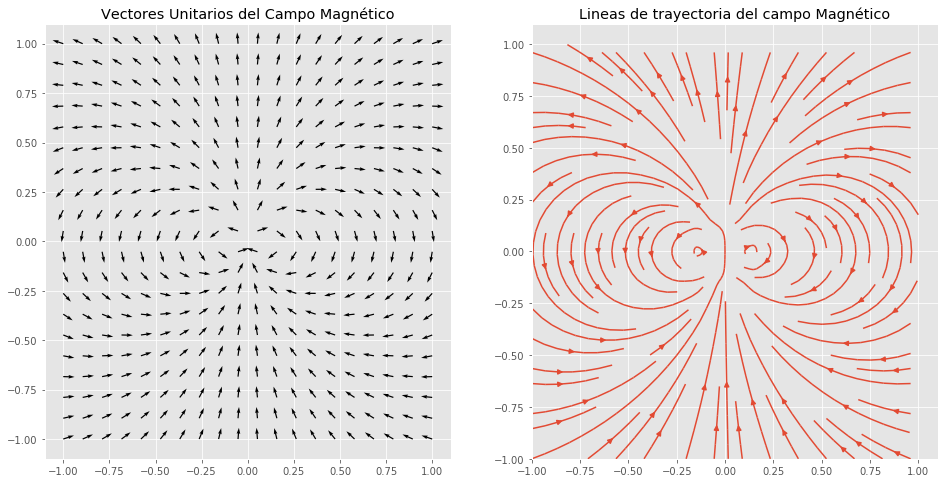

In [24]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.quiver(x,x,B_x/mag_B,B_y/mag_B)
plt.title('Vectores Unitarios del Campo Magnético')

plt.subplot(1,2,2)
plt.streamplot(X,Y,B_x,B_y)
plt.title('Lineas de trayectoria del campo Magnético')

Agregemos también un plot con ambar visualizaciones juntas, no estoy seguro cuál me gusta más.

Text(0.5, 1.0, 'Vectores Unitarios y líneas de trayectoria del Campo Magnético')

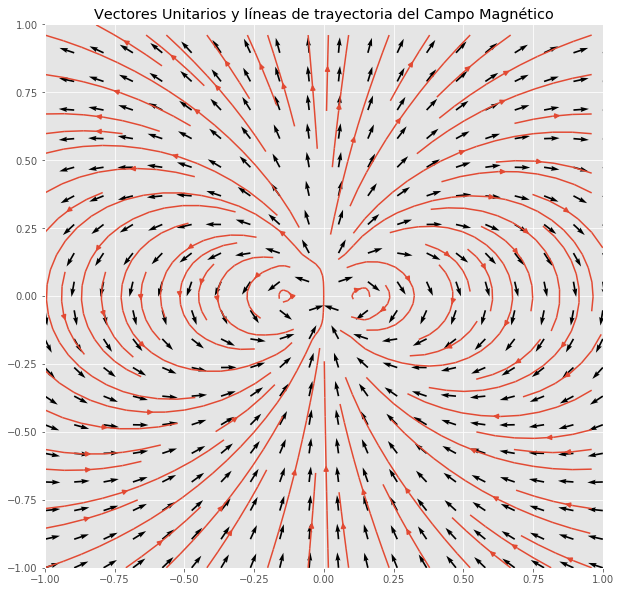

In [25]:
plt.figure(figsize=(10,10))

plt.quiver(x,x,B_x/mag_B,B_y/mag_B)
plt.streamplot(X,Y,B_x,B_y)
plt.title('Vectores Unitarios y líneas de trayectoria del Campo Magnético')